In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import pandas as pd
from googleapiclient.discovery import build
from config.config import YOUTUBE_API_KEY
from api_methods import fetch_channel_stats, fetch_video_ids, fetch_video_details

In [46]:
# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey = YOUTUBE_API_KEY)

In [47]:
# Channels to analyze
channel_ids = [
    "UC6OI7Crv96jgra5pwJNDFRQ", #Channel's name Sezen Aksu
    # Can add more channels
]

In [48]:
channel_stats = fetch_channel_stats(youtube, channel_ids)

In [49]:
channel_stats

,channelName,subscribers,views,totalVideos,playlistId
0,Sezen Aksu,2570000,2826053191,748,UU6OI7Crv96jgra5pwJNDFRQ


In [50]:
channel_stats.loc

In [51]:
playlist_id = channel_stats.loc[channel_stats['channelName']== "Sezen Aksu", "playlistId"].iloc[0]

In [52]:
video_ids = fetch_video_ids(youtube, playlist_id)  # belirli bir çalma listesine ait video id çekme işlemi gerçekleştirilecektir.

In [53]:
# Kanala ait video sayısı
len(video_ids)

749

# Kanala ait videoların detayları

In [54]:
video_details = fetch_video_details(youtube, video_ids)

In [55]:
video_details.head(n=1)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,SwFG0k9ezHg,Sezen Aksu,Sezen Aksu - Gidiyorum #SezenAksu #MinikSerçe ...,=============================\r\n\r\nSezen Aks...,"[sezen aksu, Turkish music, Turkish Pop Music,...",2023-12-03T17:00:17Z,22701,1351,None,40,PT49S,hd,false


En çok izlenme alan video'ya ait satırı bulmaya çalışalım.

Öncelikle Null değer var mı yok mu kontrol edelim

In [56]:
video_details.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [57]:
# NaN değerleri 0 sayısı ile doldurma
fill_value = 0
video_details.fillna(fill_value, inplace=True)

In [58]:
# Kontrol edelim 
video_details.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags              False
publishedAt       False
viewCount         False
likeCount         False
favouriteCount    False
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [59]:
# ? integer a çevirmeye çalış. Kolon tipi değiştirme
video_details.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount     int64
commentCount      object
duration          object
definition        object
caption           object
dtype: object

Kanal'ın en çok izlenen videolarını inceleyelim.

In [60]:
# En çok izlenen videoya ait satırı bulma
most_viewed = video_details.loc[video_details['viewCount'].astype(float).idxmax()]

# En çok izlenen videoya ait bilgiler
most_viewed_video_info = most_viewed[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# most_viewed_video_info değişkeni artık en çok izlenen videoya ait tüm bilgileri içerir
most_viewed_video_df = pd.DataFrame([most_viewed_video_info])
most_viewed_video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
68,p4yxn8ZahPI,Sezen Aksu,Sezen Aksu - Ben De Yoluma Giderim (Official V...,"""Bu haftaki çalışmamız, fırından çıktıktan son...","[sezen aksu, Turkish music, Turkish Pop Music,...",2020-02-20T20:30:04Z,124593235,646928,0,49330,PT3M44S,hd,true


In [61]:
# 'viewCount' sütununu sayısal veri türüne dönüştür
video_details['viewCount'] = pd.to_numeric(video_details['viewCount'], errors='coerce')

# NaN değerleri temizle
video_details = video_details.dropna(subset=['viewCount'])

# 'viewCount' sütununa göre DataFrame'i sırala ve en çok izlenen 10 videoyu seç
top_10_viewed = video_details.nlargest(10, 'viewCount')

# En çok izlenen 10 videoya ait bilgiler
top_10_viewed_video_info = top_10_viewed[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# top_10_viewed_video_info değişkeni artık en çok izlenen 10 videoya ait tüm bilgileri içerir
top_10_viewed_video_df = pd.DataFrame(top_10_viewed_video_info)
top_10_viewed_video_df.head(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
68,p4yxn8ZahPI,Sezen Aksu,Sezen Aksu - Ben De Yoluma Giderim (Official V...,"""Bu haftaki çalışmamız, fırından çıktıktan son...","[sezen aksu, Turkish music, Turkish Pop Music,...",2020-02-20T20:30:04Z,124593235,646928,0,49330,PT3M44S,hd,true
235,D-i77gTIEWM,Sezen Aksu,Sezen Aksu - İhanetten Geri Kalan (Official Au...,Biraz Pop Biraz Sezen - İhanetten Geri Kalan \...,"[sezen aksu, YENİ ALBÜM, SEZEN AKSU YENİ, SEZE...",2017-01-23T18:45:19Z,85832694,341229,0,17377,PT3M57S,hd,false
318,Eg6gKLXA30U,Sezen Aksu,Sezen Aksu - Tükeneceğiz (Official Audio),Sezen Aksu - Tükeneceğiz\n\nSöz: Sezen Aksu\nB...,"[sezen aksu, sezen aksu tükeneceğiz, tükeneceğ...",2016-12-25T21:23:03Z,73334199,273119,0,14558,PT4M20S,hd,true
213,6ywcf07KQZA,Sezen Aksu,Sezen Aksu - Manifesto (Official Video),"Manifesto (Biraz Pop Biraz Sezen, 2017) \n\n#l...","[sezen aksu, manifesto, sezen aksu manifesto, ...",2017-05-27T08:00:20Z,66719637,337055,0,30943,PT3M31S,hd,true
349,352QSI4nsQk,Sezen Aksu,Sezen Aksu - Kaçın Kurası (Official Audio),Söz: Sezen Aksu\nBeste: Sezen Aksu\nDüzenleme:...,"[sezen aksu, gönül gözüm kapalı bilerek sana y...",2016-12-20T08:09:09Z,65951117,297968,0,17149,PT3M46S,hd,true


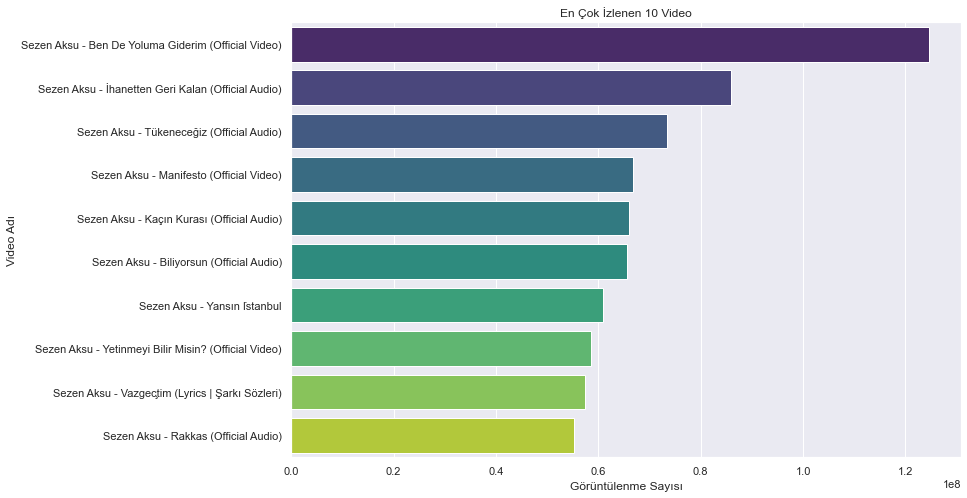

In [62]:
# En çok izlenen 10 videoya ait DataFrame'i kullanarak çubuk grafik oluşturalım
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='viewCount', y='title', data=top_10_viewed_video_df, palette='viridis')

plt.xlabel("Görüntülenme Sayısı")
plt.ylabel("Video Adı")
plt.title("En Çok İzlenen 10 Video")
plt.show()

Kanal'ın en çok beğeni alan videoları

In [63]:
most_liked = video_details.loc[video_details['likeCount'].astype(float).idxmax()]

In [64]:
most_liked_video_info = most_liked[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

In [65]:
most_liked_video_df = pd.DataFrame([most_liked_video_info])
most_liked_video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
68,p4yxn8ZahPI,Sezen Aksu,Sezen Aksu - Ben De Yoluma Giderim (Official V...,"""Bu haftaki çalışmamız, fırından çıktıktan son...","[sezen aksu, Turkish music, Turkish Pop Music,...",2020-02-20T20:30:04Z,124593235,646928,0,49330,PT3M44S,hd,true


In [66]:
# 'likeCount' sütununu sayısal veri türüne dönüştürelim
video_details['likeCount'] = pd.to_numeric(video_details['likeCount'], errors='coerce')

# NaN değerleri temizle
video_details = video_details.dropna(subset=['likeCount'])

# 'likeCount' sütununa göre DataFrame'i sırala ve en çok izlenen 10 videoyu seç
top_10_liked = video_details.nlargest(10, 'likeCount')

# En çok beğenilen 10 videoya ait bilgiler
top_10_liked_video_info = top_10_liked[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# top_10_viewed_video_info değişkeni artık en çok beğenilen 10 videoya ait tüm bilgileri içerir
top_10_liked_video_df = pd.DataFrame(top_10_liked_video_info)
top_10_liked_video_df.head(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
68,p4yxn8ZahPI,Sezen Aksu,Sezen Aksu - Ben De Yoluma Giderim (Official V...,"""Bu haftaki çalışmamız, fırından çıktıktan son...","[sezen aksu, Turkish music, Turkish Pop Music,...",2020-02-20T20:30:04Z,124593235,646928,0,49330,PT3M44S,hd,true
69,uVaG7dvT91s,Sezen Aksu,Sezen Aksu - Yetinmeyi Bilir Misin? (Official ...,"""Bu şarkının bestecisi Serkan İzzet Özdoğan. A...","[sezen aksu, Turkish music, Turkish Pop Music,...",2020-01-16T21:00:04Z,58510058,450319,0,19802,PT2M59S,hd,true
235,D-i77gTIEWM,Sezen Aksu,Sezen Aksu - İhanetten Geri Kalan (Official Au...,Biraz Pop Biraz Sezen - İhanetten Geri Kalan \...,"[sezen aksu, YENİ ALBÜM, SEZEN AKSU YENİ, SEZE...",2017-01-23T18:45:19Z,85832694,341229,0,17377,PT3M57S,hd,false
213,6ywcf07KQZA,Sezen Aksu,Sezen Aksu - Manifesto (Official Video),"Manifesto (Biraz Pop Biraz Sezen, 2017) \n\n#l...","[sezen aksu, manifesto, sezen aksu manifesto, ...",2017-05-27T08:00:20Z,66719637,337055,0,30943,PT3M31S,hd,true
247,-aW8x1jTA2U,Sezen Aksu,Sezen Aksu - Biliyorsun (Official Audio),Hayat bazen öyle insafsız ki \nKüçük bir boşlu...,"[sezen aksu, Biliyorsun, Ağlamak Güzeldir, Sez...",2016-12-26T06:29:53Z,65623612,301091,0,12397,PT5M17S,hd,false


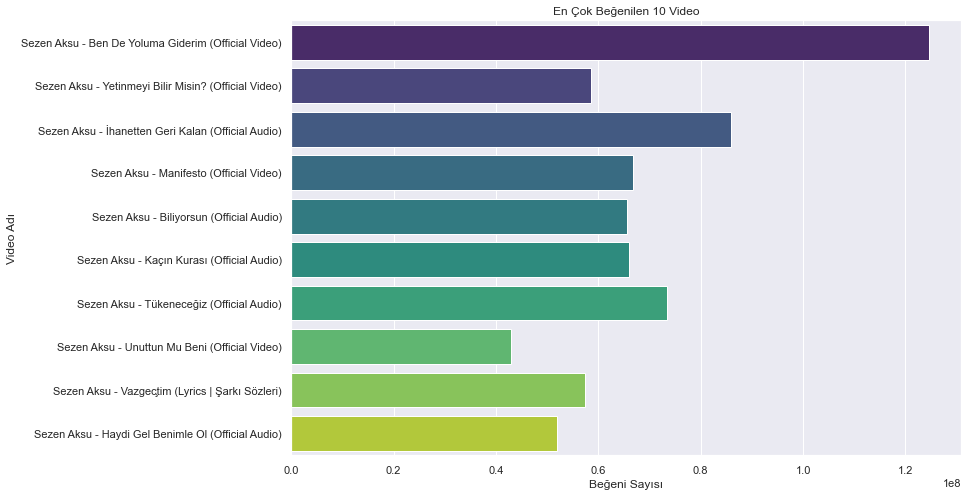

In [67]:
# En çok beğenilen 10 videoya ait DataFrame'i kullanarak çubuk grafik oluştur
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='viewCount', y='title', data=top_10_liked_video_df, palette='viridis')

# Grafik üzerine eklemeler
plt.xlabel("Beğeni Sayısı")
plt.ylabel("Video Adı")
plt.title("En Çok Beğenilen 10 Video")
plt.show()

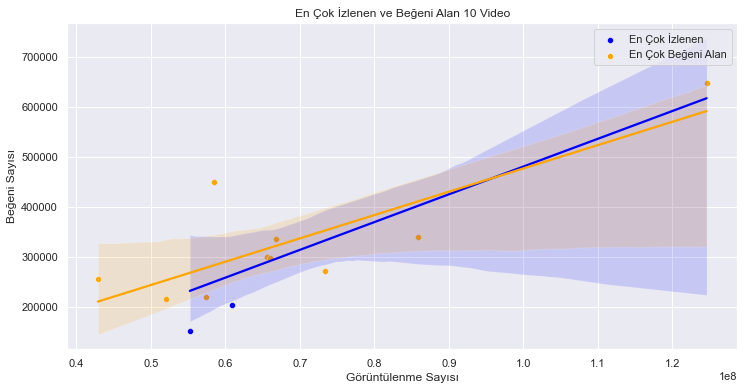

In [68]:
# En çok beğeni alan ve en çok izlenen 10 videoyu seç
top_10_likes = video_details.nlargest(10, 'likeCount')
top_10_views = video_details.nlargest(10, 'viewCount')

# Çift yönlü scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='viewCount', y='likeCount', data=top_10_views, color='blue', label='En Çok İzlenen')
sns.scatterplot(x='viewCount', y='likeCount', data=top_10_likes, color='orange', label='En Çok Beğeni Alan')

# Regresyon çizgisi ekle
sns.regplot(x='viewCount', y='likeCount', data=top_10_views, scatter=False, color='blue')
sns.regplot(x='viewCount', y='likeCount', data=top_10_likes, scatter=False, color='orange')

# Grafik üzerine eklemeler
plt.xlabel('Görüntülenme Sayısı')
plt.ylabel('Beğeni Sayısı')
plt.title('En Çok İzlenen ve Beğeni Alan 10 Video')
plt.legend()
plt.show()

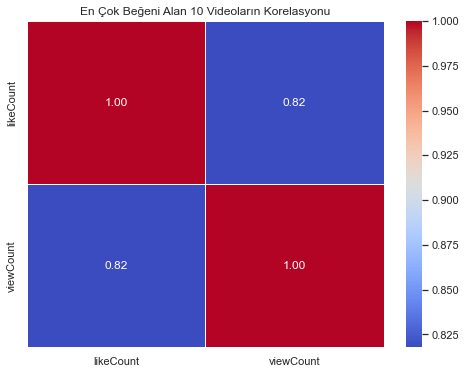

In [69]:
# En çok beğeni alan ve en çok izlenen 10 videoyu seçelim.
top_10_likes = video_details.nlargest(10, 'likeCount')
top_10_views = video_details.nlargest(10, 'viewCount')

# Seçilen video'nun 'likeCount' ve 'viewCount' değişkenleri arasındaki korelasyonu hesapla.
correlation_matrix_likes = top_10_likes[['likeCount', 'viewCount']].corr()

# Seçilen video'nun 'likeCount' ve 'viewCount' değişkenleri için a ısı haritası uygulama.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_likes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('En Çok Beğeni Alan 10 Videoların Korelasyonu')
plt.show()

Yorum : Beğeni sayısı ve izlenme sayısı arasında ki korelasyon katsayısı aralarında güçlü bir ilişki olduğunu gösterir.

In [70]:
# En çok izlenen videoya ait ID'yi liste içine eklemek
most_viewed_video_id = most_viewed['video_id']
print(most_viewed_video_id)

p4yxn8ZahPI


In [71]:
# Video istatistiklerini almak için API isteği oluşturalım.
request = youtube.videos().list(
    part="snippet,statistics",
    id= most_viewed_video_id
)
response = request.execute()

In [72]:
video_info = response['items'][0]
title = video_info['snippet']['title']
published_at = video_info['snippet']['publishedAt']
view_count = video_info['statistics']['viewCount']
like_count = video_info['statistics']['likeCount']
favorite_count = video_info['statistics']['favoriteCount']
comment_count = video_info['statistics']['commentCount']

# Verileri DataFrame'e çevirme
data = {
    "Video Adı": [title],
    "Yayın Tarihi": [published_at],
    "Görüntülenme Sayısı": [view_count],
    "Beğeni Sayısı": [like_count],
    "Favorilere Ekleme Sayısı": [favorite_count],
    "Yorum Sayısı": [comment_count]
}

video_df = pd.DataFrame(data)

In [73]:
video_df.head()

,Video Adı,Yayın Tarihi,Görüntülenme Sayısı,Beğeni Sayısı,Favorilere Ekleme Sayısı,Yorum Sayısı
0,Sezen Aksu - Ben De Yoluma Giderim (Official V...,2020-02-20T20:30:04Z,124593235,646928,0,49330


# Video hakkında yapılan yorumları inceliyoruz.

In [74]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId= most_viewed_video_id,
    maxResults=100  # maximum 100 yorum alabiliyoruz
)
response = request.execute()

In [75]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId= most_viewed_video_id,
    maxResults=100  # maximum 100 yorum alabiliyoruz
)
response = request.execute()

comment = [item['snippet']['topLevelComment']['snippet']['textDisplay'] for item in response['items']]
for item in comment:
    print(item)

ben de yoluma giderim artık :(
Ezdirmem kendimii
Bence hayatan daha çok insanlar üzüyorlar 😔😔
Insanlarin agzindan cikan sozlerine inanmayin ! Çünkü  o sozlerin yalan oldugunu birgun kanitlarlar size , hemde en aci halde. ( sende şerefsizlik lakabini kendine takip gittin. Umarim beter olursun mehso / ederinle kal şarkinla birlikte 👋bY
Vay be erkeklerin yorumlarına bakıyorum da kadinlardan daha aci cekmis bende bir erkek icin oturup ağlıyorum asla degmezmis bugun 15 gun sonra mesaj attim bir bahaneyle bana kimsiniz dedi 😔 vay bee sen otur agla adam mesajima kimsiniz desin 😢😢 bu adalet miiiiiii
Boşluktayım... paramparça..
Anladım ki sonu yok yalnızlığın<br>Ben bu dünya da acılar için varım<br>Bazı kullara keder kader olurmuş<br>Ne yazık ki ben de onlar arasındayım<br><br>Gözüm kaydı aydınlığa bir an<br>Aklım kaldı orda daha da çıkamam<br>Bazı kullarını terkeder tanrı acımadan<br>Hiçbir sevapla da kurtarılamayan<br><br>Yok bırakıp gidemezsin<br>Yok olmaz beni bunla itham edemezsin<br>Sen m

In [76]:
comments_data = []

for item in response['items']:
    comment_text = item['snippet']['topLevelComment']['snippet']['textDisplay']
    like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
    comments_data.append({'text': comment_text, 'like_count': like_count})

# DataFrame oluştur
df_comments = pd.DataFrame(comments_data)

# Beğeni sayısına göre büyükten küçüğe sırala
df_comments_sorted = df_comments.sort_values(by='like_count', ascending=False)
# İlk 10 yorumu seç
top_100_comments = df_comments_sorted.head(100)
# Sıralanmış DataFrame'i ekrana yazdır
top_100_comments

,text,like_count
35,Halen dinleyen varmı sayımızı bilelim,20
57,Ne güzel demiş Cemal Süreyya “ rastgele yürür...,17
9,&quot;Bende yoluma giderim ezdirmem kendimi am...,14
38,50 yıl sonra burası ölü insanların notları ile...,14
96,O kadar güzel yol verildi ki gidememek hata ol...,13
...,...,...
73,Günaydın mutlu sabahlar biriciğim ❤,0
72,TRT FM Tek yön sana gönderdim,0
71,...,0
67,↫و بيــטּ الفـꪆاصــل ڪـاטּ هنــاڪ نقطــة{⇢،₎࿐𓆩😴𓆪...,0


In [77]:
# Sıralanmış DataFrame'i CSV dosyasına kaydet
top_100_comments.to_csv('en_cok_begenilen_yorumlar.csv', index=False)

c:\Users\Asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127811 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127811 missing from current font.
  font.set_text(s, 0, flags=flags)


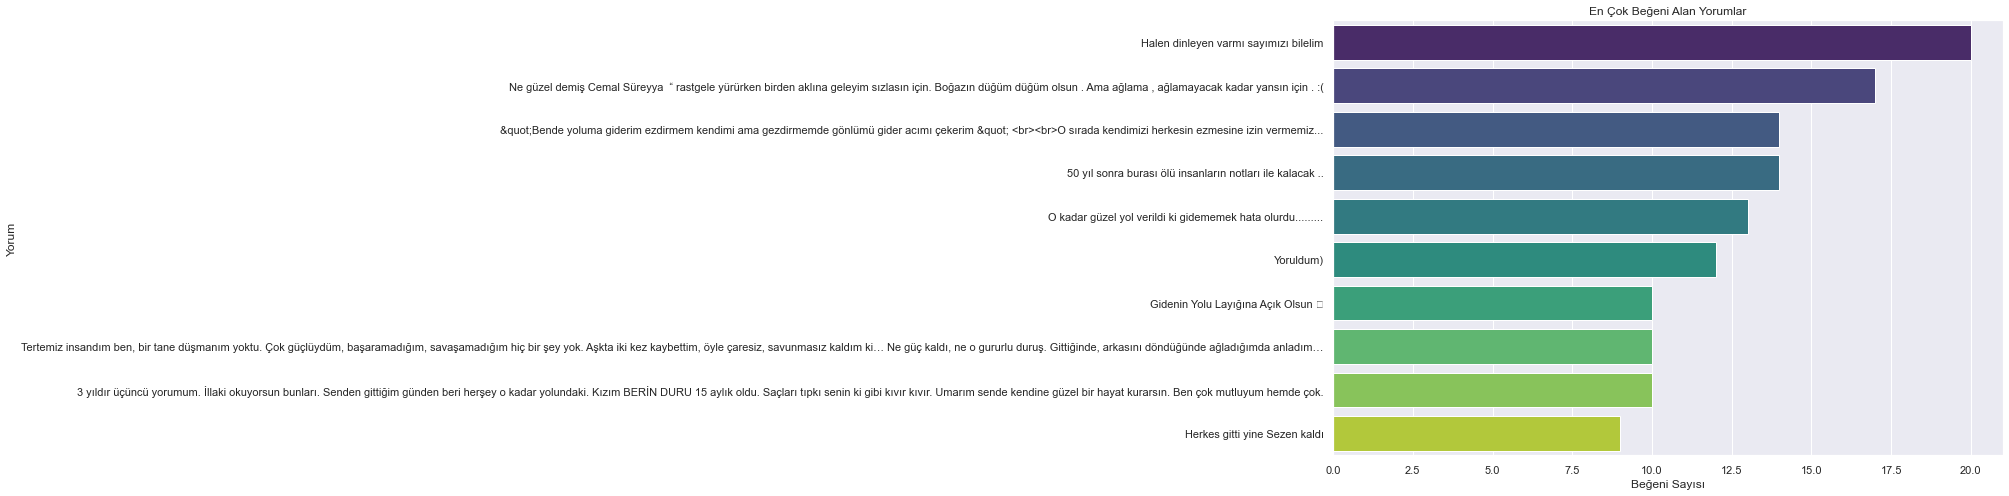

In [78]:
# Yukarıdaki csv'yi okuma
df_comments_loaded = pd.read_csv('en_cok_begenilen_yorumlar.csv')

# Beğeni sayısına göre büyükten küçüğe sıralama
df_comments_loaded = df_comments_loaded.sort_values(by='like_count', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))
sns.barplot(x='like_count', y='text', data=df_comments_loaded.head(10), palette='viridis')
plt.title('En Çok Beğeni Alan Yorumlar')
plt.xlabel('Beğeni Sayısı')
plt.ylabel('Yorum')
plt.show()

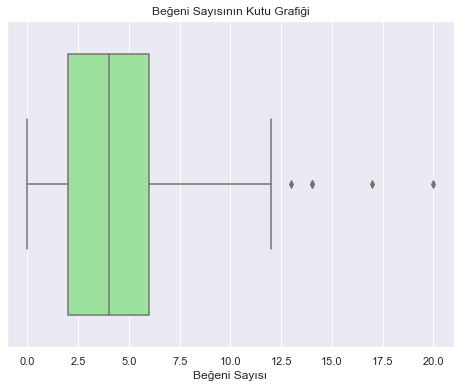

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_comments_loaded['like_count'], color='lightgreen')
plt.title('Beğeni Sayısının Kutu Grafiği')
plt.xlabel('Beğeni Sayısı')
plt.show()

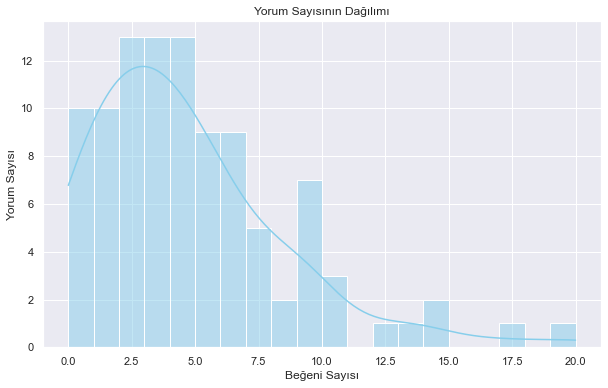

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(df_comments_loaded['like_count'], bins=20, kde=True, color='skyblue')
plt.title('Yorum Sayısının Dağılımı')
plt.xlabel('Beğeni Sayısı')
plt.ylabel('Yorum Sayısı')
plt.show()